# 🎵 Pure Synthetic Songs

This tutorial explains how to generate pure synthetic songs through the motor gestures. For this guide, there is not need of recording sample, however you must define the project directory.

::::{admonition} Google Colab Execution
:class: dropdown

If you are using Google Colab install the pacakge via pypi with the following code:

:::{code} bash
! pip install wavesongs
:::


::::

## Libraries

Import the required classes and functions from `wavesongs`:

In [1]:
from wavesongs import plot
from wavesongs.objs.syllable import Syllable
from wavesongs.utils.paths import ProjDirs
from wavesongs.models.bird import _PARAMS, alpha_beta, motor_gestures

## Synthetic Syllable

### Project Directory

In [2]:
proj_dirs = ProjDirs(audios="./assets/audios", results="./assets/results")

### Base Syllable

First, let's create a base syllable with a defined duration and a sample rate. The object created is a simple pulse of amplitud 1.

In [ ]:
synth = Syllable(proj_dirs=proj_dirs, duration=1, sr=44100)
# add plot

### Motor Gesture

The next step is to define the motor gesture coefficients. These coefficients will generate the air-sac pressure and labial tension curves, forming the motor gesture. This will produce a synthetic syllable, for which we need to compute its acoustical features by defining some spectral parameters.

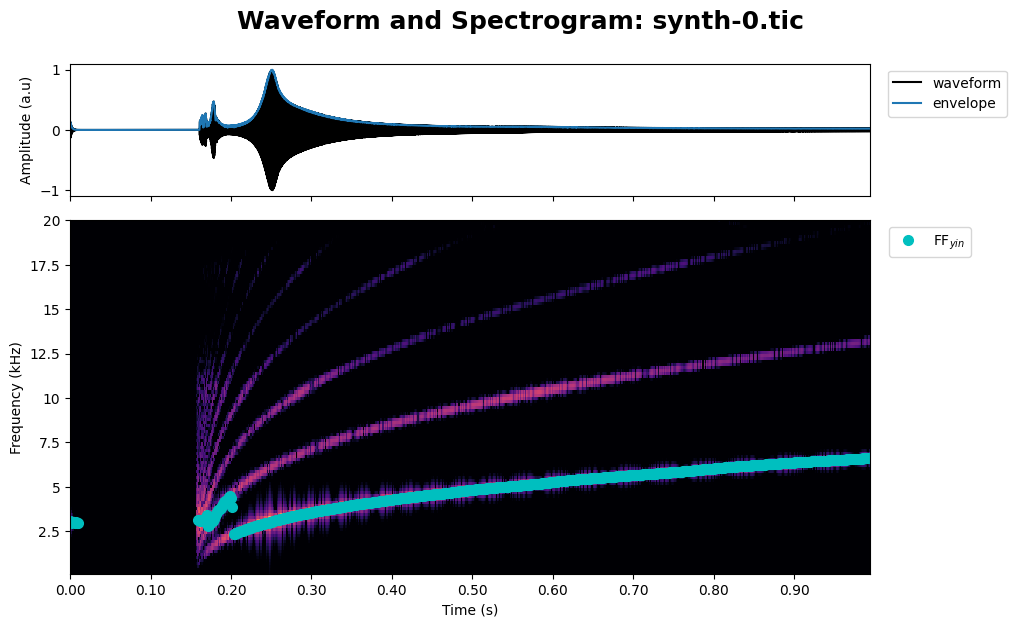

In [6]:
# Motor gesture coefficients

z = {
    "a0": 0.11,
    "b0": -0.1,
    "b1": 1, 
    "b2": 0,
}

curves = alpha_beta(synth, z, method="fast")
synth = motor_gestures(synth, curves, _PARAMS)
synth.acoustical_features(umbral_FF=1.4, NN=256, ff_method="yin", flim=(1e2, 2e4))
plot.spectrogram_waveform(synth, ff_on=True, save=False)

In [7]:
synth.play()

#### Curves

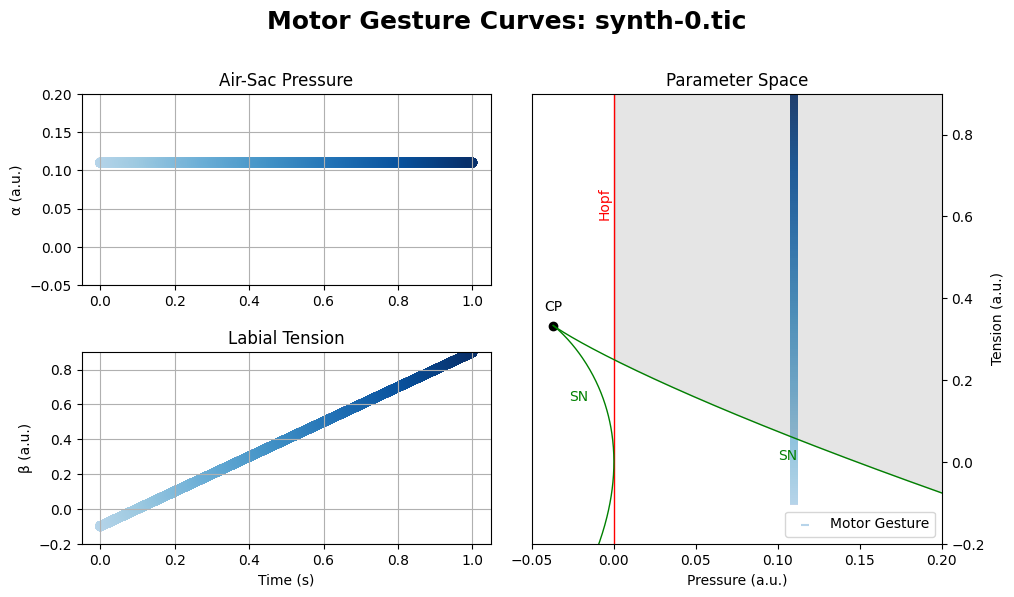

In [4]:
plot.alpha_beta(synth, save=False)

## Tunning Coefficients

As you experienced, the motor gesture is out of the region of oscillations (gray region), so the audio generated is not correct. The beginning of the audio is missing because the beginning of the motor gesture is below the saddle node line. To improve the song created, the motor gesture has to be moved inside the region. This can be done in several ways, but here is a short description of the model behavior: to get more harmonics in the song, more close or separeted, move the motor gesture to the left; to get lower or higher fundamental frequencies, move the motor gesture down or up, respectively.

It is also possible to get very low or high fundamental frequency by changing the time scale parameter, $\gamma$. To do that, modify the `gm` key of the `_PARAMS` dictionary. The default value is 40000.

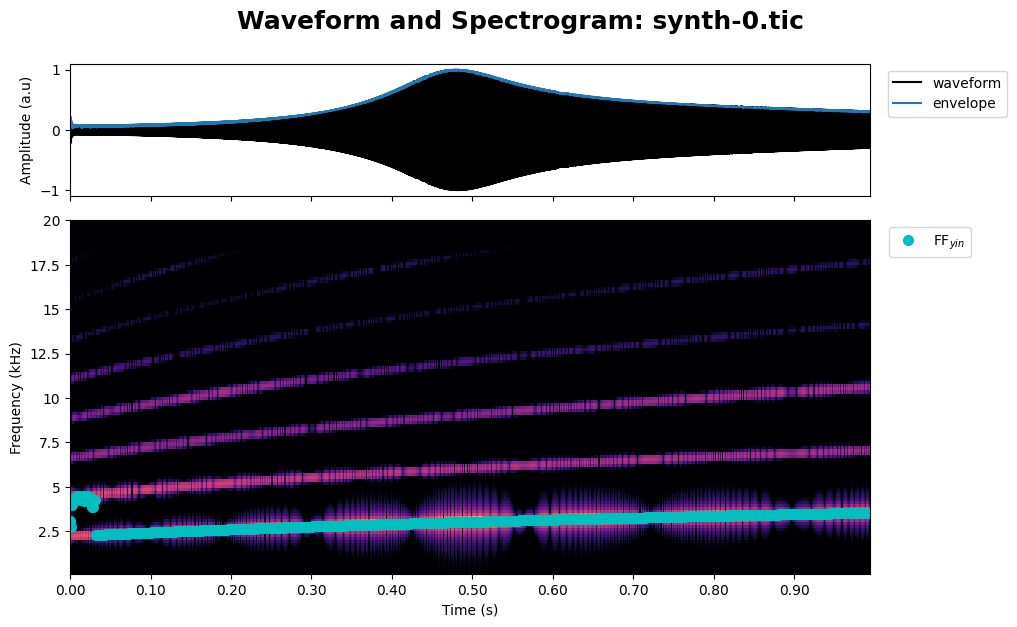

In [16]:
z_opt = {
    "a0": 0.11,
    "b0": 0.1,
    "b1": 0.1, 
    "b2": 0,
}

curves = alpha_beta(synth, z_opt, method="fast")
synth_opt = motor_gestures(synth, curves, _PARAMS)
synth_opt.acoustical_features(umbral_FF=1.4, NN=256, ff_method="yin", flim=(1e2, 2e4))
plot.spectrogram_waveform(synth_opt, ff_on=True, save=False)

There you go!

The song obtained is much better because the beginning of the motor gesture is close to the saddle node line. The harmonics are stronger than the fundamental frequency, and it is not well computed. Although this can be improved, we are interested in demonstrating this behavior since it can affect the synthetic score. So, take it in account when you are generating synthetic syllables from recording examples.

In [9]:
synth_opt.play()

### Motor Gesture Curves

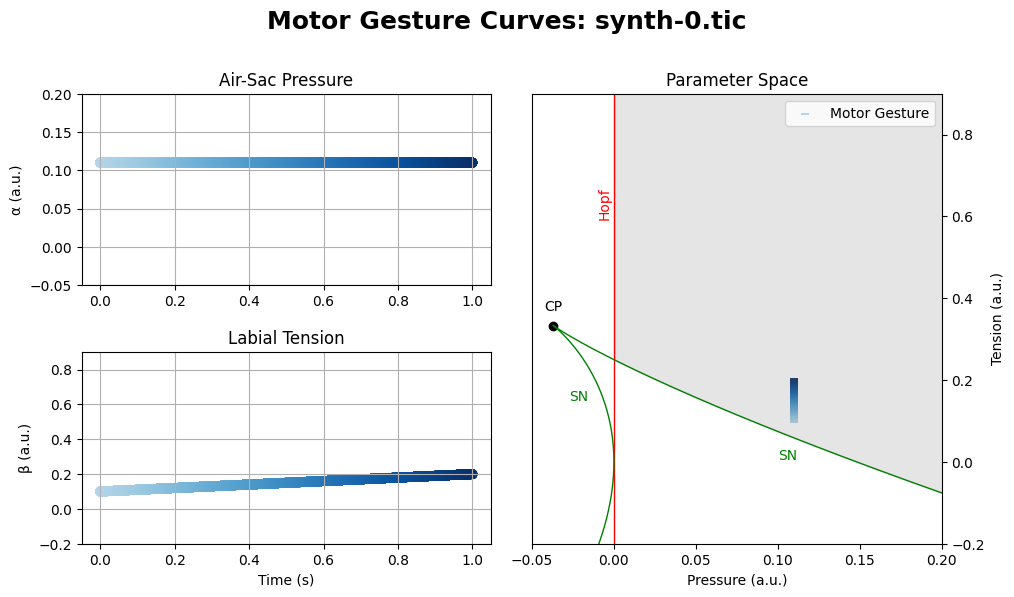

In [17]:
plot.alpha_beta(synth_opt, save=False)

<hr>

This tutorial demonstrated how the physical model behaves and how the coefficients improve or worsen the resulting synthetic syllable. Now it is your time to play with the coefficients and generate the syllable you want. You can generate not just lines but also quadratic curves by changing the values, especially `b0`. 